/var/folders/_x/85c_20bd0yg0yw7bsqgk4qbh0000gp/T/ipykernel_12041/1615995596.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china['china_normal'] = (china['계'] - china['계'].mean())/china['계'].std()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


      국적      관광     상용   공용  유학/연수     기타       계  year  month year_month  \
18    중국   40425  11930   55   2751  36091   91252  2010      1     201001   
85    중국   60590   7907   68  29546  42460  140571  2010      2     201002   
152   중국   50330  13549  174  14924  62480  141457  2010      3     201003   
219   중국   84252  13306  212   2199  47711  147680  2010      4     201004   
286   중국   89056  12325  360   2931  49394  154066  2010      5     201005   
...   ..     ...    ...  ...    ...    ...     ...   ...    ...        ...   
8058  중국  393336   2813   99  10433  75000  481681  2020      1     202001   
8125  중국   49520    715   11  20753  33087  104086  2020      2     202002   
8192  중국    5040    115    2   7388   4050   16595  2020      3     202003   
8259  중국     522     71    0   1112   2230    3935  2020      4     202004   
8326  중국     179     70    2   1189   3684    5124  2020      5     202005   

     quarter weather  china_normal  
18        1Q  winter     -

<Axes: xlabel='year_month', ylabel='계'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


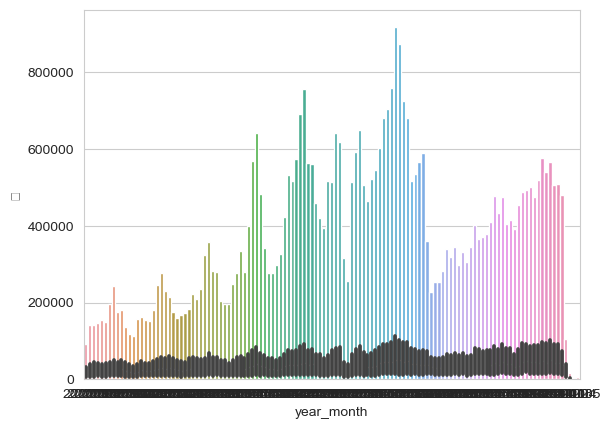

In [163]:
import pandas as pd
import koreanize_matplotlib
import seaborn as sns

df=pd.DataFrame()

for year in range(2010, 2021):
    for month in range(1, 13):
        if(year==2020 and month==6): break
        dirname = "팀과제/Data/"
        filename = "kto_" + str(year) + str(month).zfill(2) + ".xlsx"
        df_tmp = pd.read_excel(dirname + filename,
                              header=1,
                              usecols="A:G",
                              skipfooter=4)
        df_tmp["year"]=year
        df_tmp["month"]=month
        df_tmp["year_month"]=str(year) + str(month).zfill(2)
        #df_tmp[""] = df_tmp.groupby("year_month")["관광"].sum()
        
        if(month==1 or month==2 or month==3): df_tmp["quarter"] = "1Q"
        elif(month==4 or month==5 or month==6): df_tmp["quarter"] = "2Q"
        elif(month==7 or month==8 or month==9): df_tmp["quarter"] = "3Q"
        elif(month==10 or month==11 or month==12): df_tmp["quarter"] = "4Q"

        if(month==12 or month==1 or month==2): df_tmp["weather"] = "winter"
        elif(month==4 or month==5 or month==3): df_tmp["weather"] = "spring"
        elif(month==7 or month==8 or month==6): df_tmp["weather"] = "summer"
        elif(month==10 or month==11 or month==9): df_tmp["weather"] = "fall"

        df = pd.concat([df, df_tmp], ignore_index=True)

china=df[df["국적"]=="중국"]
china['china_normal'] = (china['계'] - china['계'].mean())/china['계'].std()
print(china)

df_sum=df.groupby("year")["관광"].sum()
china_sum=china.groupby("year")["관광"].sum()
ratio = china_sum/df_sum

In [ ]:
sns.lineplot(ratio)
plt.xlabel("Year")
plt.ylabel("china/total ratio")


In [162]:
df_sum=df.groupby("year")["관광"].sum()
df_sum

year
2010    12733768
2011    14406214
2012    17313636
2013    18151376
2014    21854960
2015    20270978
2016    27865850
2017    20831188
2018    24828696
2019    28864550
2020     3154432
Name: 관광, dtype: int64

In [152]:
china_sum=china.groupby("year")["관광"].sum()
china_sum

year
2010    1011800
2011    1312511
2012    2033665
2013    3139867
2014    4772800
2015    4712133
2016    6948372
2017    3116505
2018    3701973
2019    4893429
2020     448597
Name: 관광, dtype: int64

year
2010    0.079458
2011    0.091107
2012    0.117460
2013    0.172982
2014    0.218385
2015    0.232457
2016    0.249351
2017    0.149608
2018    0.149101
2019    0.169531
2020    0.142212
Name: 관광, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'china ratio')

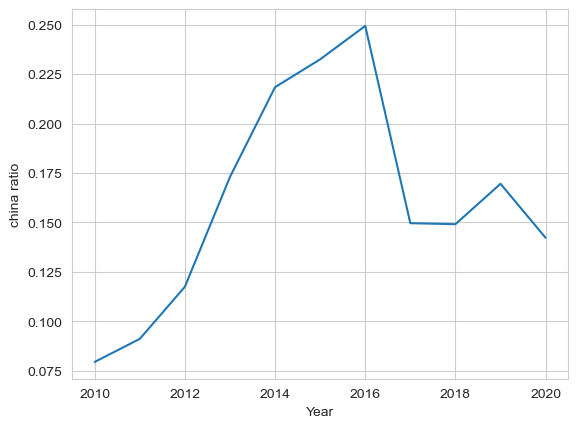

In [160]:
ratio = china_sum/df_sum
print(ratio)
sns.lineplot(ratio)
plt.xlabel("Year")
plt.ylabel("china ratio")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

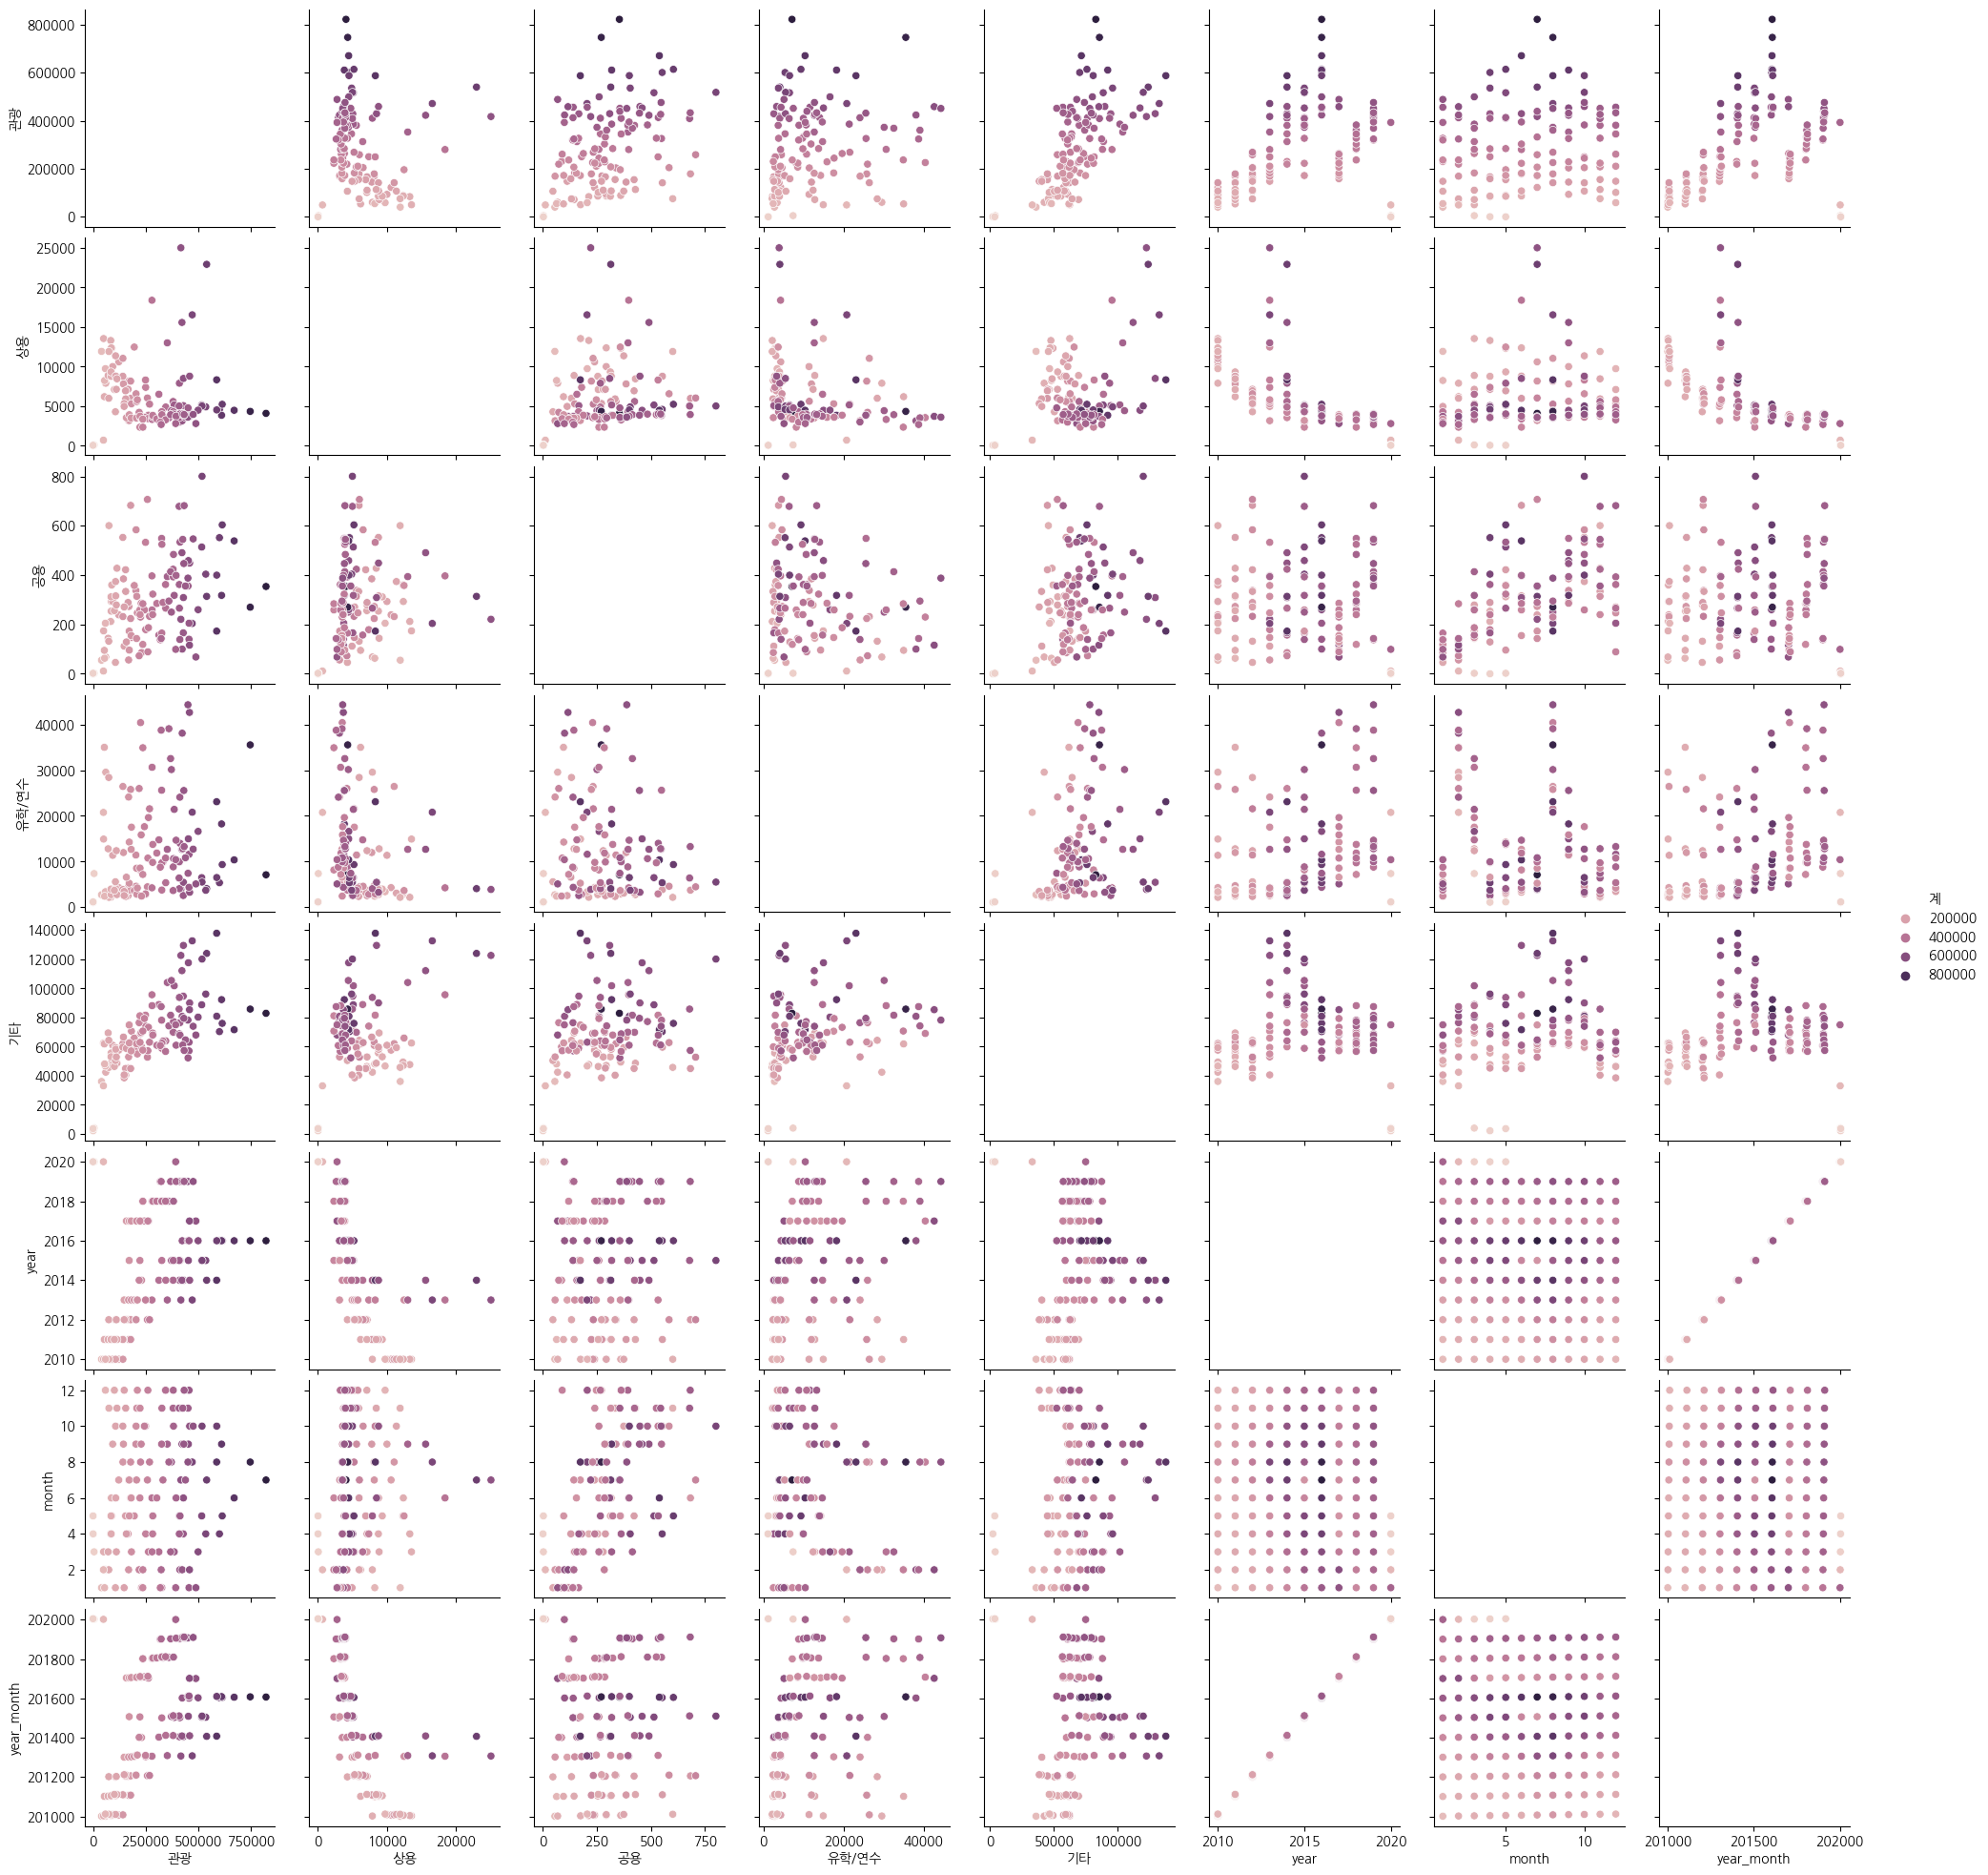

In [49]:
sns.pairplot(china, hue="계", )

<Axes: xlabel='year_month', ylabel='계'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


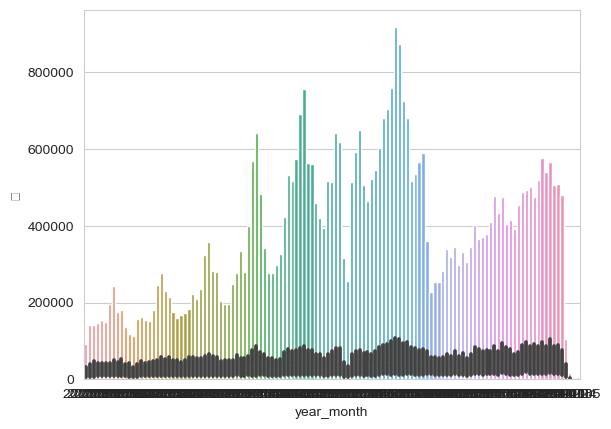

In [136]:
sns.barplot(china, x=str("year_month"), y="계")
sns.barplot(df, x=str("year_month"), y="계")
sns.lineplot()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


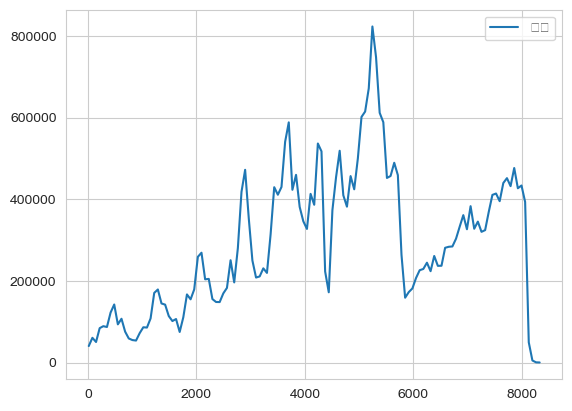

In [147]:
m=china[['year_month','관광']]
sns.lineplot(m)

In [99]:
china.groupby("year")['계'].sum()

year
2010    1875157
2011    2220196
2012    2836892
2013    4326869
2014    6126865
2015    5984170
2016    8067722
2017    4169353
2018    4789512
2019    6023021
2020     611421
Name: 계, dtype: int64

<Axes: xlabel='year_month', ylabel='normal'>

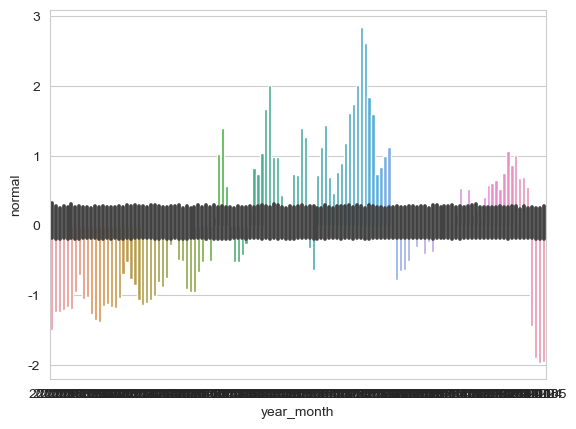

In [134]:
sns.barplot(china, x=str("year_month"), y="china_normal")
sns.barplot(df, x=str("year_month"), y="normal")

In [120]:
china_1617 = china[(china["year"] == 2016) | (china["year"] == 2017)]
import koreanize_matplotlib
sns.barplot(china_1617, x="year_month", y="sum")

SyntaxError: invalid non-printable character U+0008 (2556713908.py, line 3)